<a href="https://colab.research.google.com/github/ASWIN-01s/Time-Series-Analysis-Assesment/blob/main/Kovai_co_TimeSeries_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_csv('TimeSeries_Data.csv',parse_dates=['Date'])
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0


In [7]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1916.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.983299
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.760110
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1916 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [10]:
df.tail()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0
1917,26/07/2023,16680,11726,347,20438,4738,99.0


In [123]:
# Here I changed the Datatype of Date column to DateTime because it is in object format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Set the 'Date' column as the index
df = df.set_index('Date')

**INSIGHT 1 - THE GIVEN TIME SERIES DATA IS STATIONARY OR NON STATIONARY**

In [101]:

from statsmodels.tsa.stattools import adfuller
import numpy as np
# Function to check stationarity using ADF test
def is_stationary(series):
    series = series.dropna()
    series = series[np.isfinite(series)]

    result = adfuller(series)
    p_value = result[1]
    if p_value < 0.05:
        return True
    else:
        return False

# Test each column for stationarity
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']:
    stationarity = is_stationary(df[column])
    print(f"{column}: {'Stationary' if stationarity else 'Non-Stationary'}")

Local Route: Stationary
Light Rail: Stationary
Peak Service: Stationary
Rapid Route: Stationary
School: Stationary
Other: Stationary


**INSIGHT 2 - DECOMPOSITION OF THE TIME SERIES**

<ipython-input-109-c979cd1f09fe>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = df['Local Route'].resample('M').sum()


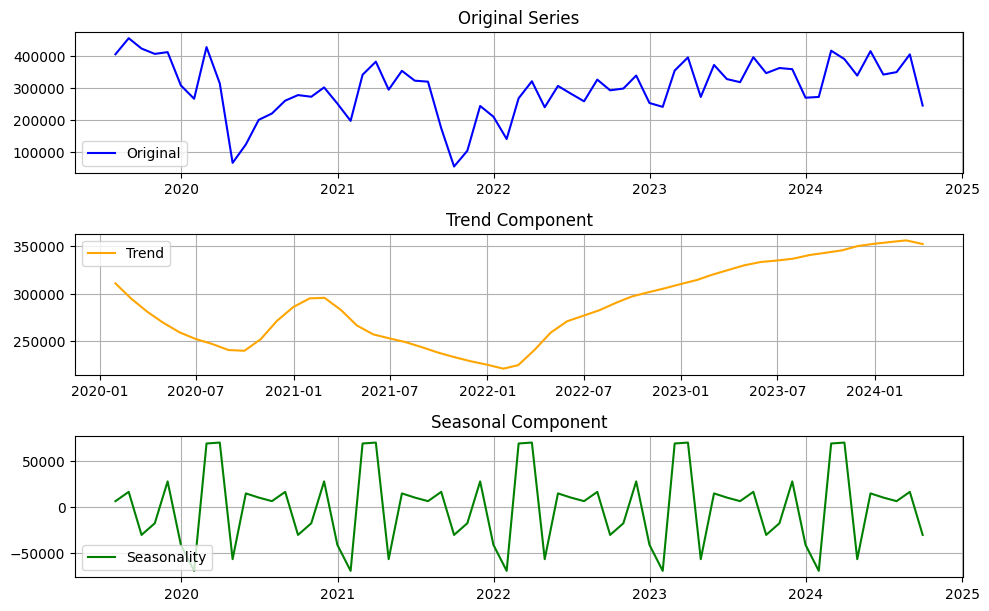

In [109]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = df['Local Route'].resample('M').sum()

# Perform seasonal decomposition with monthly period
decomposition_monthly = seasonal_decompose(series, model='additive', period=12)
# Plot the decomposition
plt.figure(figsize=(10, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(series, label='Original', color='blue')
plt.title('Original Series')
plt.legend(loc='best')
plt.grid(True)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition_monthly.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')
plt.grid(True)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition_monthly.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

**INSIGHT 3 - RESIDUAL COMPONENT AND AUTOCORRELATION ANLYSIS**

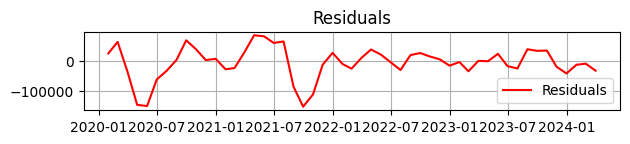

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_monthly.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

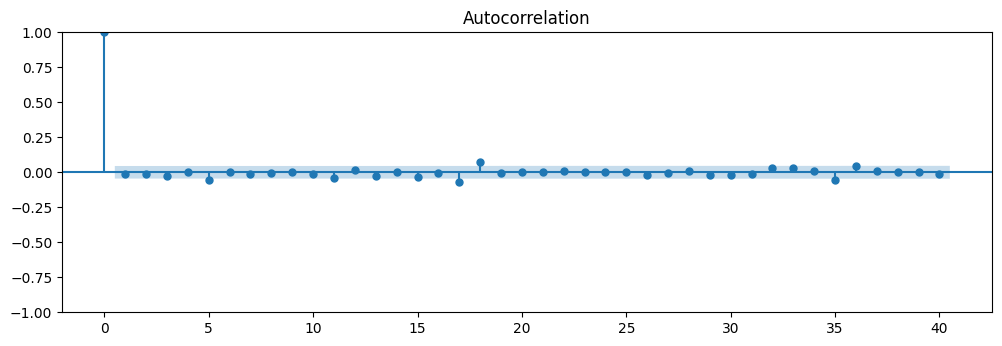

In [127]:
from statsmodels.graphics.tsaplots import plot_acf
df = df.reset_index()
data = df[['Date', 'Local Route']]
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Local Route'].iloc[13:],lags=40,ax=ax1)

 **INSIGHT 4 - USAGE OF DIFFERENT SERVICES WITH MONTHLY TREND**

<ipython-input-124-904955a2eeeb>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


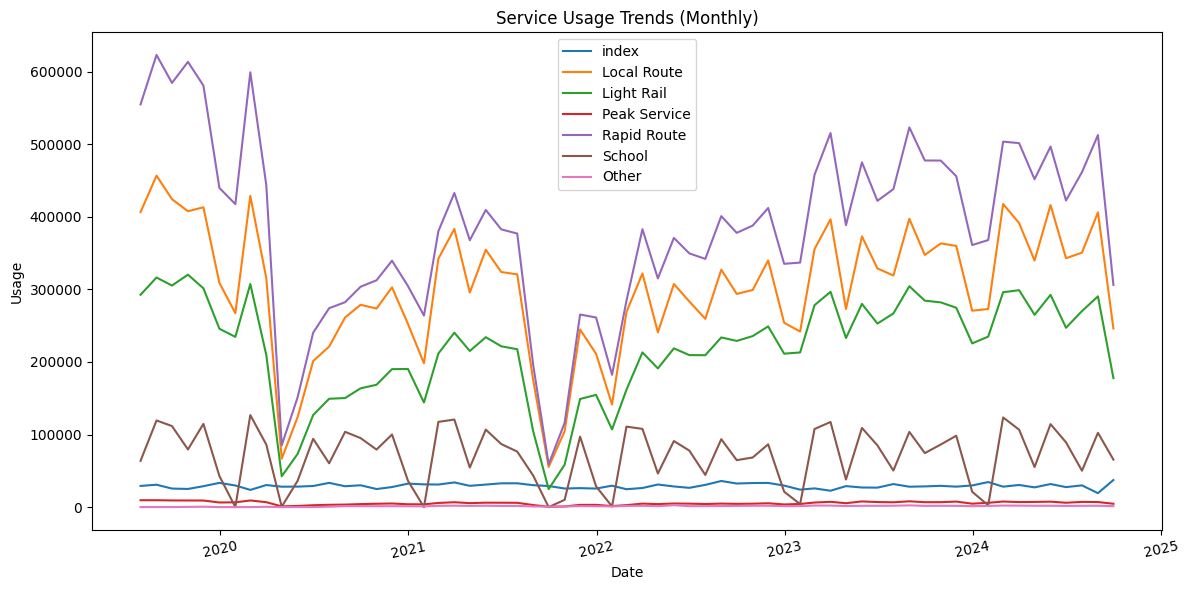

In [124]:


# Resample the data to a monthly frequency, summing the values for each month
monthly_data = df.resample('M').sum()

# Plot the trends for each service
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for col in monthly_data.columns:
    plt.plot(monthly_data.index, monthly_data[col], label=col)
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Service Usage Trends (Monthly)')
plt.xticks(rotation=12)
plt.legend()
plt.tight_layout()
plt.show()

**Elaborated Insight**

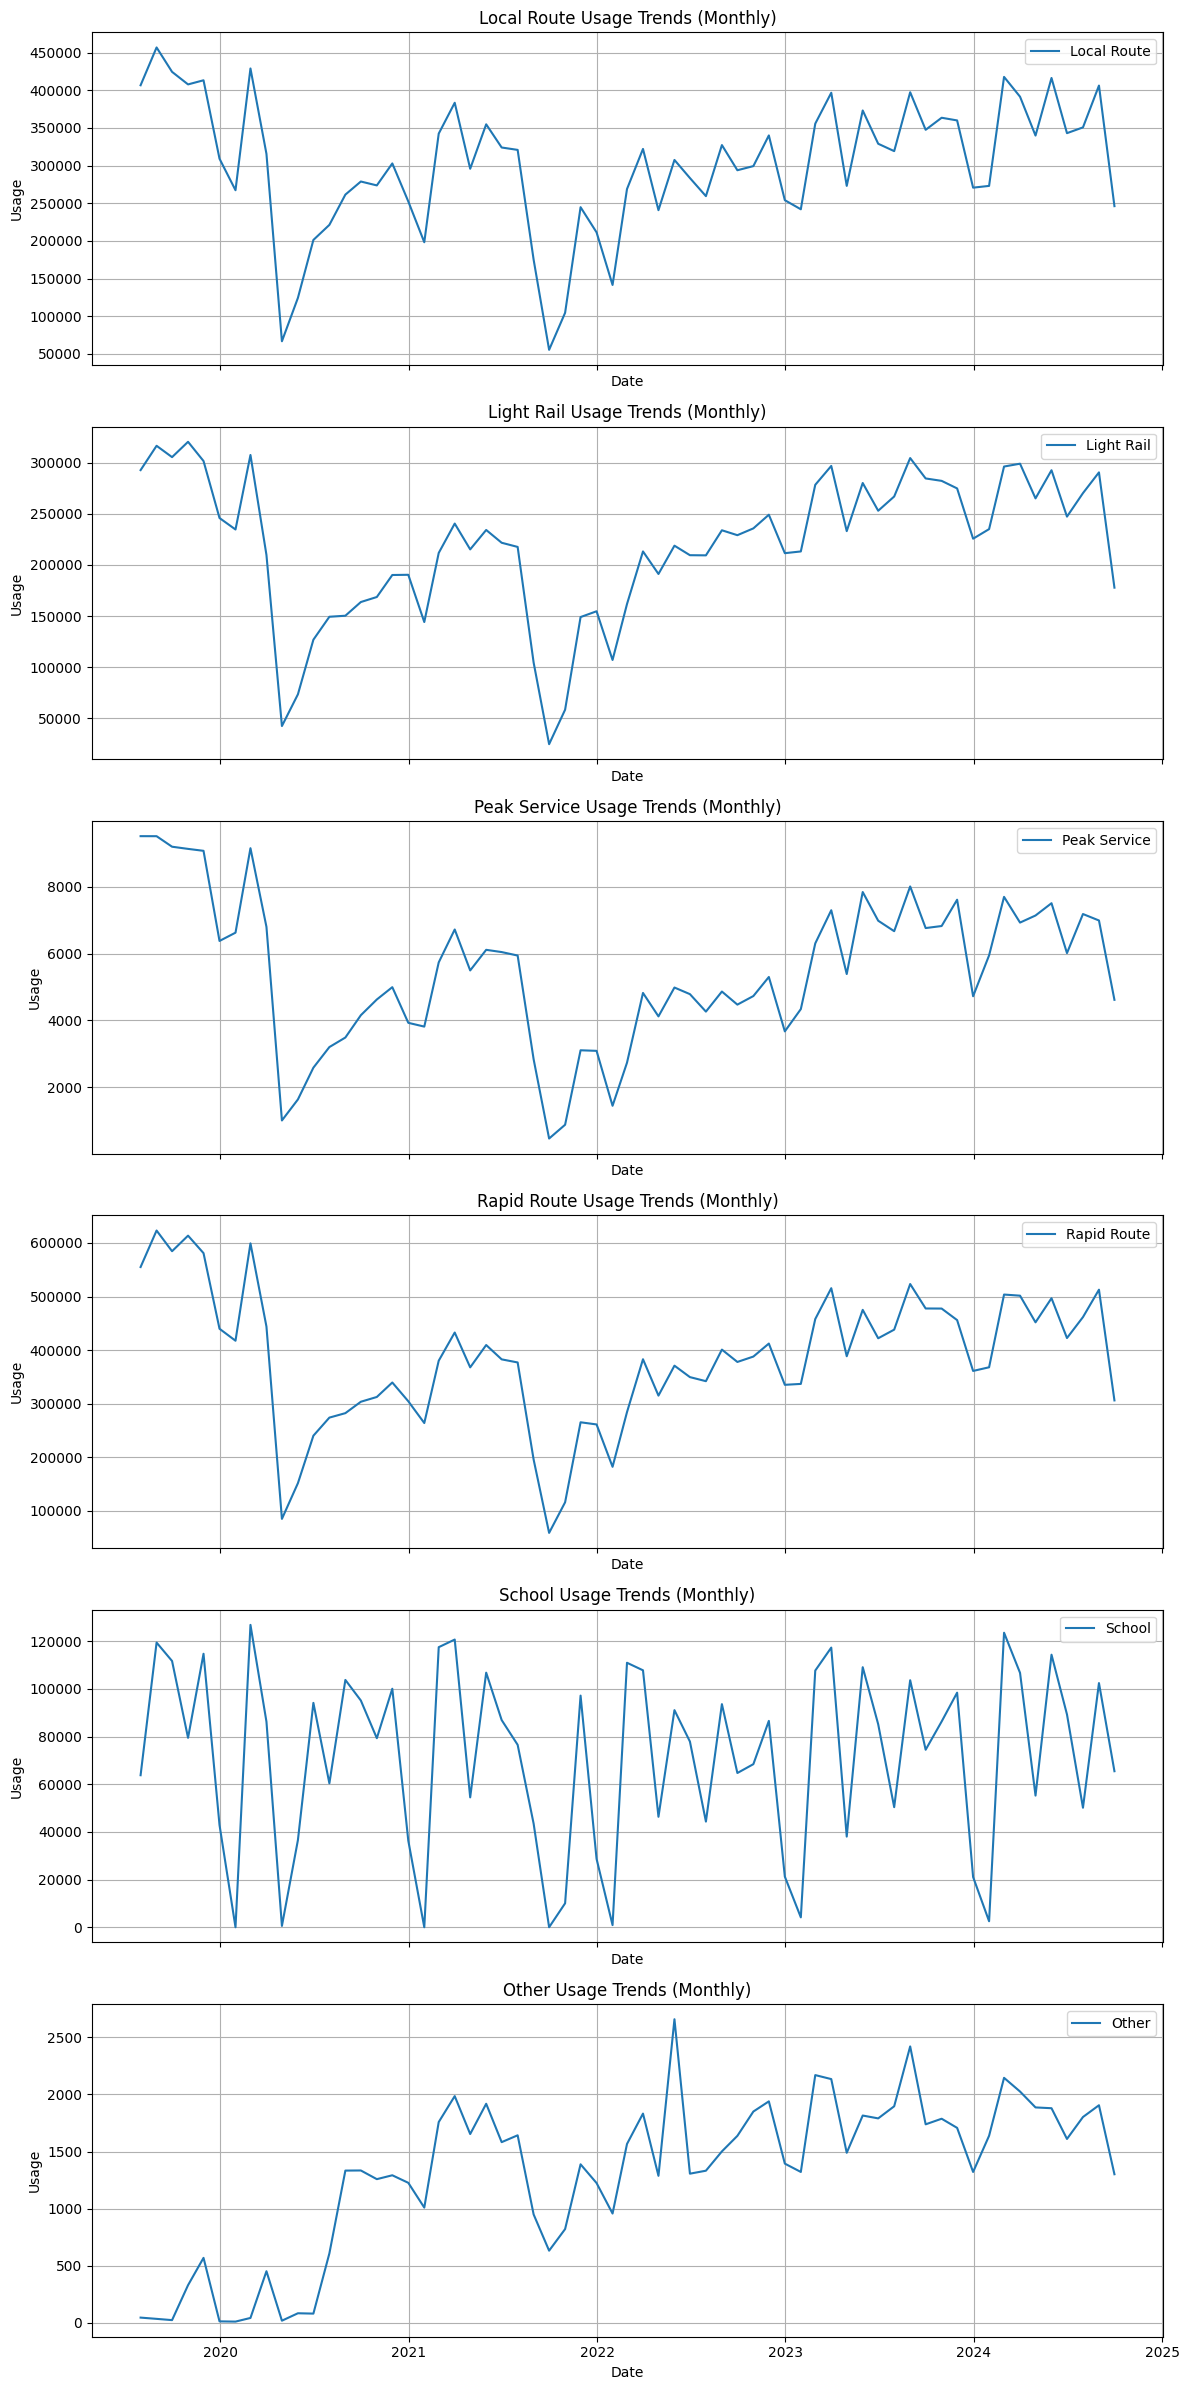

In [110]:

# Create subplots for each service
num_services = len(monthly_data.columns)
fig, axes = plt.subplots(num_services, 1, figsize=(12, 4 * num_services), sharex=True)

# Plot each service in a separate subplot
for i, col in enumerate(monthly_data.columns):
    axes[i].plot(monthly_data.index, monthly_data[col], label=col)
    axes[i].set_ylabel('Usage')
    axes[i].set_xlabel('Date')
    axes[i].set_title(f'{col} Usage Trends (Monthly)')
    axes[i].legend()
    axes[i].grid()

    plt.xlabel('Date')

plt.tight_layout()
plt.show()


**TASK 2 - FORECASTING -NOTE: IN DATA VARIABLE YOU CAN THE COLUMN NAME TO SEE FORCASTING FOR PARTICULAR TRANSPORT SERVICES**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

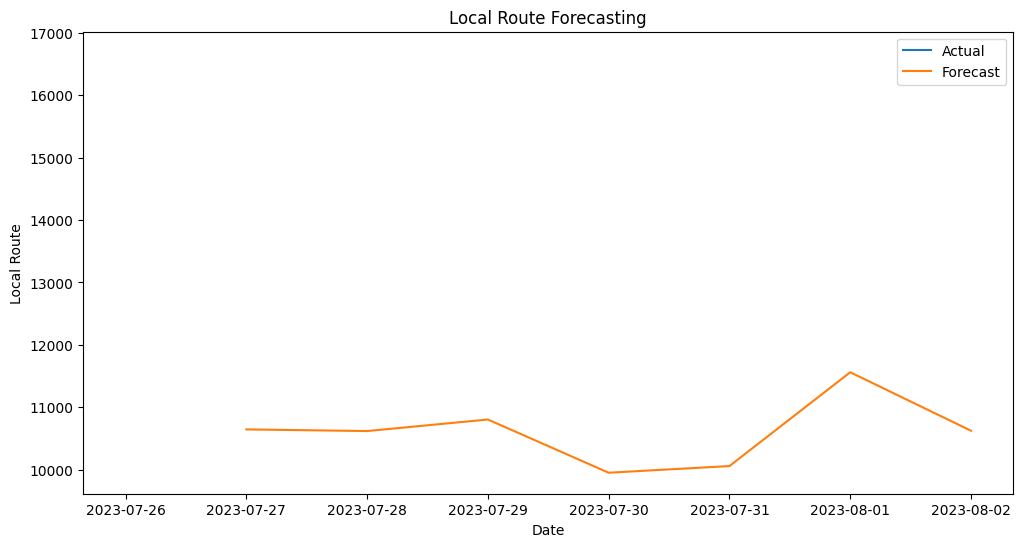

In [117]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm

if 'level_0' in df.columns:
    df = df.drop(columns=['level_0'])

data = df[['Date', 'Local Route']]

# Set the 'Date' column as the index
data = data.set_index('Date')


# Fit an ARIMA model
model = ARIMA(data, order=(5, 1, 0))
#model=sm.tsa.statespace.SARIMAX(data,order=(5, 1, 1),seasonal_order=(1,1,1,12))

model_fit = model.fit()

# Make predictions for the next 7 days
forecast = model_fit.predict(start=len(data), end=len(data) + 6)

# Create a dataframe for plotting
forecast_df = pd.DataFrame({'Date': pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=7), 'Local Route': forecast})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Local Route'][-1:], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Local Route'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Local Route')
plt.title('Local Route Forecasting')
plt.legend()
plt.show()

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [130]:
!git config --global user.name "Aswin-01s"
!git config --global user.email "aswinsivakumar01s@gmail.com"

In [ ]:
%cd /content/drive/MyDrive/https://colab.research.google.com/drive/13VOTjSCO1FF39JLwf9L8mXtOw54N02IQ#scrollTo=vakE0Zte8J1L